<a href="https://colab.research.google.com/github/DanielaJim07/Simulaci-n-I/blob/main/SIMULACION_Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado del problema

Se analiza un sistema de inventario con las siguientes características:

- La demanda mensual de un producto sigue una distribución empírica con probabilidades específicas para cantidades entre 35 y 60 unidades.
- La demanda presenta un comportamiento estacional, representado mediante un  factor de ajuste mensual.
- El tiempo de entrega de los pedidos es aleatorio y puede tomar valores de 1, 2 o 3 meses, con probabilidades $0.30$, $0.40$ y $0.30$, respectivamente.

El sistema de inventario opera bajo una política de:
- *Lote de pedido constante*  $q$.
- *Nivel de reorden*  $R$.
- *Inventario inicial*: 150 unidades.

## Costos considerados:
- Costo de ordenar: $100$ por cada orden colocada.
- Costo de inventario: $20 $ por unidad almacenada al año $\Rightarrow \frac{20}{12} \approx 1.667$ por mes.
- Costo por faltante: $50 por unidad no satisfecha.

---

## Objetivo

Simular el comportamiento del sistema de inventario durante un periodo de 12 meses, utilizando números aleatorios para:

- Generar demandas (usando el método de la transformada inversa).
- Simular los tiempos de entrega de los pedidos.

Y con ello calcular los *costos totales anuales* del sistema bajo una política dada por:
- $$ q = 200 $$ unidades por orden.
- $$ R = 100 $$ unidades como nivel de reorden.

Al finalizar, se reportan:
- El comportamiento mensual del inventario y la demanda.
- Los costos mensuales y acumulados.
- Las gráficas de evolución del inventario y los costos.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Aplicamos el método de la transformada inversa para simular la demanda

In [9]:
# Funciones: Transformada Inversa
# ---------------------------

def transformada_demanda(u):
    if u < 0.010: return 35
    elif u < 0.025: return 36
    elif u < 0.045: return 37
    elif u < 0.065: return 38
    elif u < 0.087: return 39
    elif u < 0.110: return 40
    elif u < 0.135: return 41
    elif u < 0.162: return 42
    elif u < 0.190: return 43
    elif u < 0.219: return 44
    elif u < 0.254: return 45
    elif u < 0.299: return 46
    elif u < 0.359: return 47
    elif u < 0.424: return 48
    elif u < 0.494: return 49
    elif u < 0.574: return 50
    elif u < 0.649: return 51
    elif u < 0.719: return 52
    elif u < 0.784: return 53
    elif u < 0.844: return 54
    elif u < 0.894: return 55
    elif u < 0.934: return 56
    elif u < 0.964: return 57
    elif u < 0.980: return 58
    elif u < 0.995: return 59
    else: return 60

Método de la Transfomada para simular los tiempos de entrega

In [10]:
def transformada_entrega(u):
    if u < 0.30: return 1
    elif u < 0.70: return 2
    else: return 3

Los parámetros son los datos dados por el enunciado del problema

In [11]:
# ---------------------------
# Parámetros
# ---------------------------
q = 200                          # Cantidad por orden
R = 100                          # Nivel de reorden
inventario_inicial = 150        # Inventario inicial
meses = 12
costo_ordenar = 100
costo_inventario_mensual = 20 / 12
costo_faltante = 50
factores_estacionales = [1.20, 1.00, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40]



In [12]:
# ---------------------------
# Simulación
# ---------------------------
np.random.seed(1)
inventario = inventario_inicial
pedidos = []  # lista de tuplas (mes_entrega, cantidad)
historial = []

for mes in range(1, meses + 1):
    # Lleg tada de pedidos
    llegada = sum(cant for m_entrega, cant in pedidos if m_entrega == mes)
    inventario += llegada
    pedidos = [(m_entrega, cant) for m_entrega, cant in pedidos if m_entrega > mes]

    # Demanda aleatoria
    u_d = np.random.rand()
    demanda_base = transformada_demanda(u_d)
    demanda_ajustada = round(demanda_base * factores_estacionales[mes - 1])

    # Inventario y faltante
    inv_inicial = inventario
    faltante = max(demanda_ajustada - inventario, 0)
    inventario = max(inventario - demanda_ajustada, 0)
    inv_promedio = (inv_inicial + inventario) / 2

    # Evaluación de orden
    se_ordena = inventario < R
    u_e = np.random.rand() if se_ordena else None
    tiempo_entrega = transformada_entrega(u_e) if se_ordena else None
    mes_entrega = mes + tiempo_entrega if se_ordena and (mes + tiempo_entrega) <= 12 else None
    if mes_entrega:
        pedidos.append((mes_entrega, q))

    # Costos
    costo_o = costo_ordenar if se_ordena else 0
    costo_i = inv_promedio * costo_inventario_mensual
    costo_f = faltante * costo_faltante
    costo_total = costo_o + costo_i + costo_f

    # Registro mensual
    historial.append({
        'Mes': mes,
        'U demanda': round(u_d, 5),
        'Demanda base': demanda_base,
        'Demanda ajustada': demanda_ajustada,
        'Inventario inicial': inv_inicial,
        'Inventario final': inventario,
        'Inventario promedio': round(inv_promedio, 2),
        'Faltantes': faltante,
        'Se ordena': se_ordena,
        'U entrega': round(u_e, 5) if u_e else '-',
        'Mes entrega': mes_entrega if mes_entrega else '-',
        'Costo ordenar': costo_o,
        'Costo inventario': round(costo_i, 2),
        'Costo faltante': costo_f,
        'Costo total': round(costo_total, 2)
    })

In [13]:
# ---------------------------
# Resultados
# ---------------------------
df = pd.DataFrame(historial)
costo_total_anual = df[['Costo ordenar', 'Costo inventario', 'Costo faltante']].sum()

print(df)
print("\n--- COSTOS TOTALES ---")
print(f"Costo de ordenar:   ${costo_total_anual['Costo ordenar']:.2f}")
print(f"Costo de inventario:${costo_total_anual['Costo inventario']:.2f}")
print(f"Costo de faltantes: ${costo_total_anual['Costo faltante']:.2f}")
print(f"TOTAL:              ${costo_total_anual.sum():.2f}")

    Mes  U demanda  Demanda base  Demanda ajustada  Inventario inicial  \
0     1    0.41702            48                58                 150   
1     2    0.00011            35                35                  92   
2     3    0.14676            42                38                  57   
3     4    0.18626            43                34                 619   
4     5    0.34556            47                38                 585   
5     6    0.39677            48                34                 547   
6     7    0.53882            50                40                 513   
7     8    0.41919            48                43                 473   
8     9    0.68522            52                52                 430   
9    10    0.20445            44                53                 378   
10   11    0.87812            55                72                 325   
11   12    0.02739            37                52                 253   

    Inventario final  Inventario prom

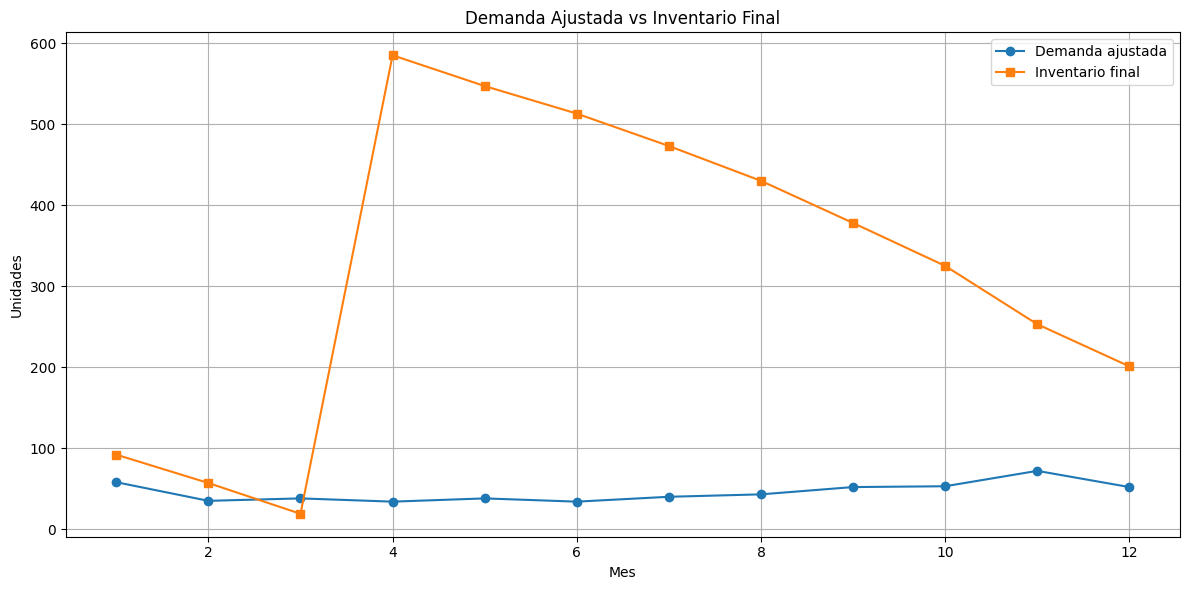

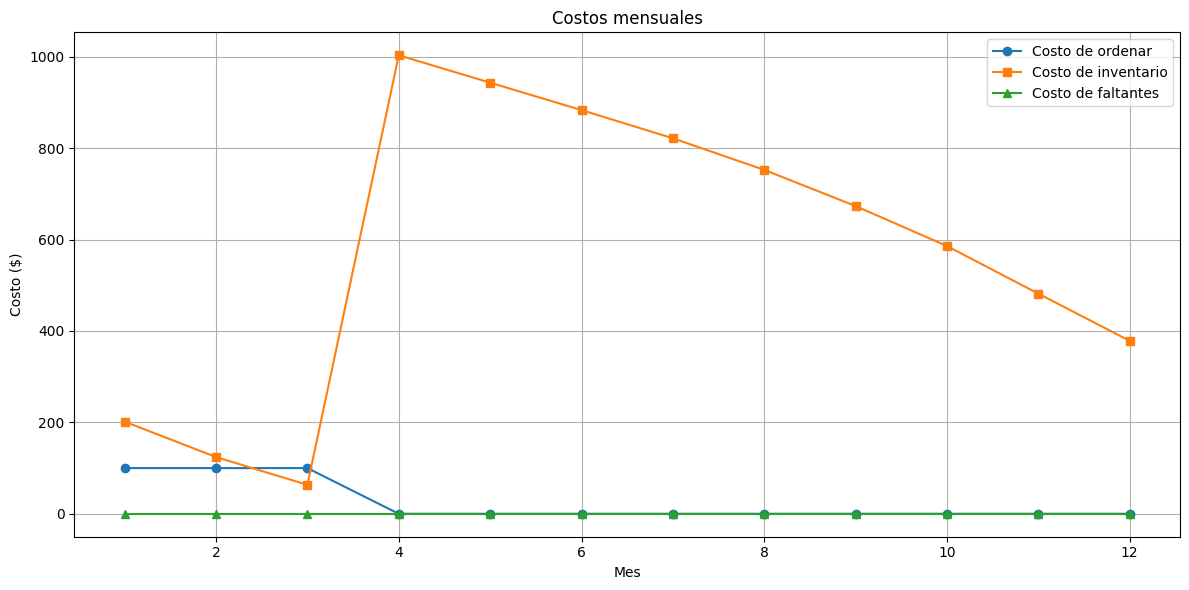

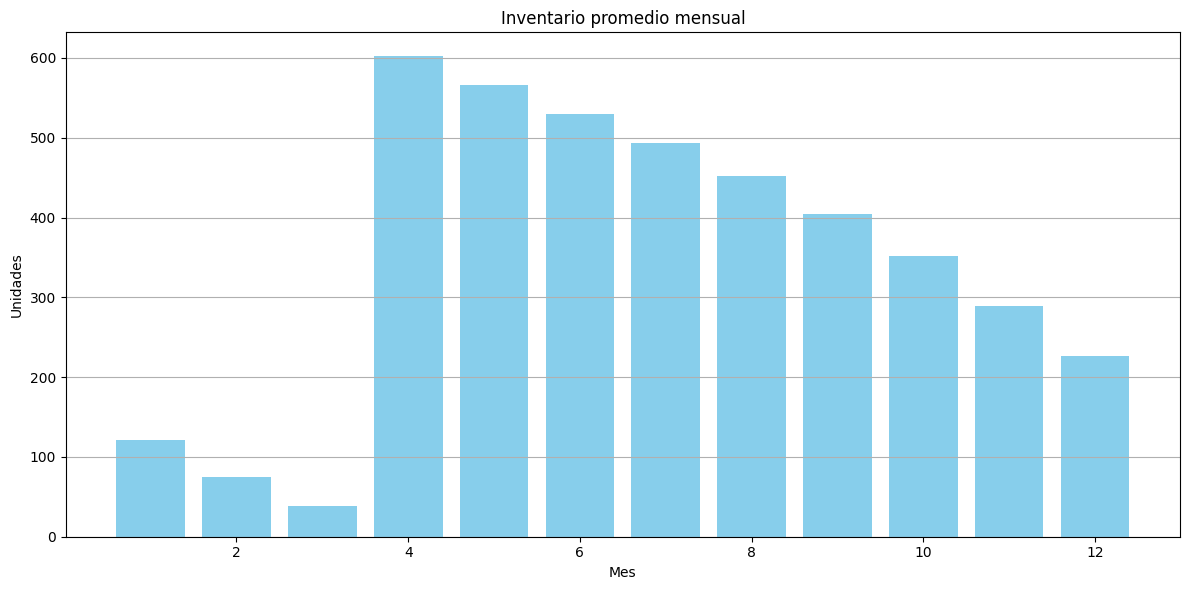

In [14]:

# Gráfica de demanda ajustada e inventario final
plt.figure(figsize=(12, 6))
plt.plot(df['Mes'], df['Demanda ajustada'], marker='o', label='Demanda ajustada')
plt.plot(df['Mes'], df['Inventario final'], marker='s', label='Inventario final')
plt.title('Demanda Ajustada vs Inventario Final')
plt.xlabel('Mes')
plt.ylabel('Unidades')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica de costos mensuales
plt.figure(figsize=(12, 6))
plt.plot(df['Mes'], df['Costo ordenar'], marker='o', label='Costo de ordenar')
plt.plot(df['Mes'], df['Costo inventario'], marker='s', label='Costo de inventario')
plt.plot(df['Mes'], df['Costo faltante'], marker='^', label='Costo de faltantes')
plt.title('Costos mensuales')
plt.xlabel('Mes')
plt.ylabel('Costo ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica del inventario promedio
plt.figure(figsize=(12, 6))
plt.bar(df['Mes'], df['Inventario promedio'], color='skyblue')
plt.title('Inventario promedio mensual')
plt.xlabel('Mes')
plt.ylabel('Unidades')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Resultados y Conclusiones de la Simulación

*Parámetros utilizados:*

- Lote de pedido: $$ q = 200 $$ unidades.
- Nivel de reorden: $$ R = 100 $$ unidades.
- Inventario inicial: 150 unidades.
- Periodo simulado: 12 meses.
- Números aleatorios generados automáticamente.
- Demanda ajustada mensualmente por factores estacionales.

---

## Costos acumulados al final del año:
- *Costo total por ordenar:* 300.00 pesos (3 órdenes colocadas).
- *Costo total por mantener inventario:* 6,912.49 pesos
- *Costo total por faltantes:* 0.00  pesos
- *Costo total anual:* 7,212.49 pesos

---

## Conclusiones:

- La política de inventario con $$ q = 200 $$ y $$ R = 100 $$ resultó adecuada, ya que no se registraron faltantes durante el año.
- Sin embargo, los *costos por mantener inventario* fueron elevados, lo cual sugiere que es posible *optimizar los parámetros* $$ q $$ y $$ R $$ para reducir el costo total.
